In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
# Importing the dataset
dataset = pd.read_csv("column_3C_weka.csv")

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [28]:
dataset.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [29]:
# Compute correlation matrix
corr_data = dataset.iloc[:, :6]
corr_matrix = corr_data.corr()

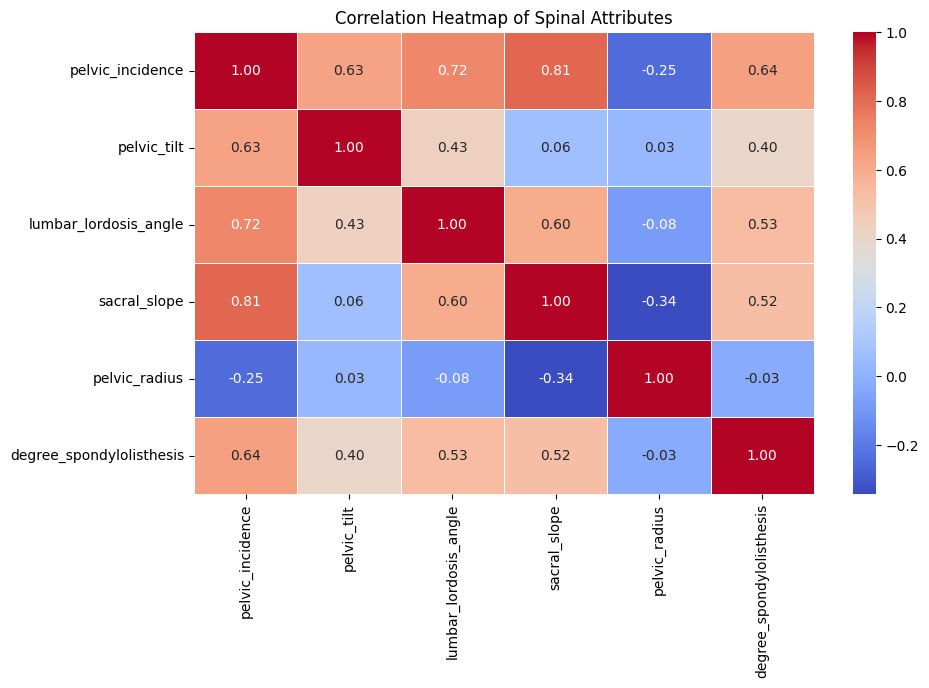

In [30]:
# Plot heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            linewidths=0.5)
plt.title("Correlation Heatmap of Spinal Attributes")
plt.show()

**Attribut yang cukup linear:**
1. Pelvic Incidence vs Pelvic Tilt
2. Pelvic Incidence vs Lumbar Lordosis Angle
3. Pelvic Incidence vs Sacral Slope
4. Pelvic Incidence vs Degree Spondylolisthesis
5. Lumbar Lordosis Angle vs Sacral Slope
6. Lumbar Lordosis vs Degree Spondylolisthesis
7. Sacral Slope vs Degree Spondylolisthesis


In [31]:
dataset = dataset[['pelvic_incidence', 'pelvic_tilt']]
pi = dataset.iloc[:, :-1].values
pt = dataset.iloc[:, 1].values

In [32]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(pi, pt, test_size=1/3,
                                                    random_state=0)

In [33]:
# Step 2 - Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [34]:
# Step 3 - Predicting the Test Set Results
y_pred = regressor.predict(x_test)

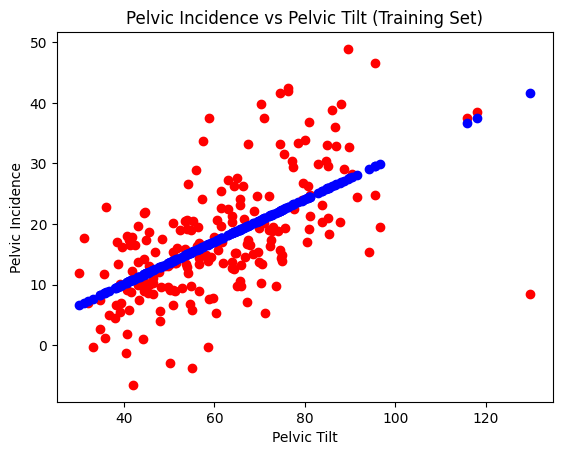

In [35]:
# Step 4 - Visualizing the Training Set results
plt.scatter(x_train, y_train, color='red')
plt.scatter(x_train, regressor.predict(x_train), color='blue')
plt.title('Pelvic Incidence vs Pelvic Tilt (Training Set)')
plt.xlabel('Pelvic Tilt')
plt.ylabel('Pelvic Incidence')
plt.show()

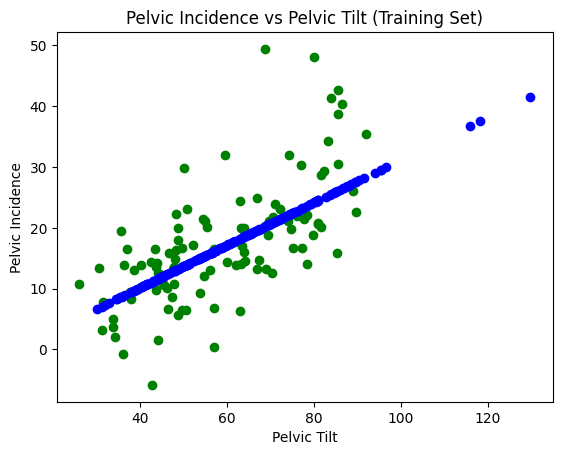

In [36]:
# Step 5 - Visualizing the Test Set Results
plt.scatter(x_test, y_test, color='green')
plt.scatter(x_train, regressor.predict(x_train), color='blue')
plt.title('Pelvic Incidence vs Pelvic Tilt (Training Set)')
plt.xlabel('Pelvic Tilt')
plt.ylabel('Pelvic Incidence')
plt.show()